In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/data.csv", encoding='latin1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [ ]:
df.shape

(541909, 9)

In [ ]:
df['revenue'].sum()

np.float64(9747747.933999998)

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
revenue,float64


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,revenue
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
returns = df[df['InvoiceNo'].str.contains('C', na=False)]
returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [ ]:
returns.describe()

,Quantity,UnitPrice,CustomerID,revenue
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.667266,-96.556039
std,1145.786965,666.600430,1706.772357,2039.905511
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.700000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [ ]:
s = returns['StockCode'].value_counts()
s

,count
StockCode,
M,244
22423,181
POST,126
22960,87
D,77
...,...
20961,1
23523,1
90058B,1


In [ ]:
s.describe()

,count
count,1947.000000
mean,4.770416
std,9.964180
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,244.000000


In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
country_revenue = df.groupby('Country')['revenue'].sum().reset_index()
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)
display(country_revenue)

,Country,revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


In [ ]:
x = df['revenue'].max()
y = df['revenue'].min()
print(x,y)

168469.6 -168469.6


In [ ]:
if x == 168469.6: print(df.loc[df['revenue'] == 168469.6])
if y == -168469.6: print(df.loc[df['revenue'] == -168469.6])

       InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

           InvoiceDate  UnitPrice  CustomerID         Country   revenue  
540421  12/9/2011 9:15       2.08     16446.0  United Kingdom  168469.6  
       InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

           InvoiceDate  UnitPrice  CustomerID         Country   revenue  
540422  12/9/2011 9:27       2.08     16446.0  United Kingdom -168469.6  


In [ ]:
returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [ ]:
returns.describe()

,Quantity,UnitPrice,CustomerID,revenue
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.667266,-96.556039
std,1145.786965,666.600430,1706.772357,2039.905511
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.700000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [ ]:
returns['revenue'].sum()

np.float64(-896812.49)

In [ ]:
z = returns['Quantity'].min()
if z == -80995: print(returns.loc[returns['Quantity'] == -80995])

       InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

           InvoiceDate  UnitPrice  CustomerID         Country   revenue  
540422  12/9/2011 9:27       2.08     16446.0  United Kingdom -168469.6  


In [ ]:
paper_craft_item = df[df['StockCode'] == '23843']
display(paper_craft_item)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6


In [ ]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
revenue             0
dtype: int64


In [ ]:
second_highest_revenue_df = df['revenue'].sort_values(ascending=False).iloc[1]
print(f"Second highest maximum revenue in df: {second_highest_revenue_df}")

second_highest_revenue_returns = returns['revenue'].sort_values(ascending=False).iloc[1]
print(f"Second highest maximum revenue in returns: {second_highest_revenue_returns}")

Second highest maximum revenue in df: 77183.6
Second highest maximum revenue in returns: -0.19


In [ ]:
highest_df_value = df['revenue'].sort_values(ascending=False).iloc[0]
print("Row(s) with the second highest maximum revenue in df:")
display(df[df['revenue'] == highest_df_value])

highest_returns_value = returns['revenue'].sort_values(ascending=False).iloc[-1]
print("\nRow(s) with the second highest maximum revenue in returns:")
display(returns[returns['revenue'] == highest_returns_value])



Row(s) with the second highest maximum revenue in df:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6



Row(s) with the second highest maximum revenue in returns:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6


In [ ]:
df_no_returns = df.drop(returns.index)
display(df_no_returns.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_no_returns.shape

(532621, 9)

In [ ]:
df_no_returns['revenue'].sum()

np.float64(10644560.424000002)

In [ ]:
returns.shape

(9288, 9)

In [ ]:
df.shape

(541909, 9)

In [ ]:
'''gross = df_no_returns['revenue'].sum()
print(gross)

ret = returns['revenue'].sum()
print(ret)

Net_sales = gross + ret
print(Net_sales)'''

"gross = df_no_returns['revenue'].sum()\nprint(gross)\n\nret = returns['revenue'].sum()\nprint(ret)\n\nNet_sales = gross + ret\nprint(Net_sales)"

In [ ]:
print(df['revenue'].sum())

9747747.933999998


In [ ]:
country_revenue = df.groupby('Country')['revenue'].sum().reset_index()
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)
display(country_revenue)

,Country,revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
# Gross sales by country
gross_by_country = df_no_returns.groupby('Country')['revenue'].sum()

# Returns by country
returns_by_country = returns.groupby('Country')['revenue'].sum()

# Combine
net_by_country = gross_by_country.add(returns_by_country, fill_value=0)

print(net_by_country.sort_values(ascending=False))


Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [ ]:
df.duplicated().sum()

np.int64(5268)

In [ ]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
display(duplicates.head())

Number of duplicate rows: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,2.95


In [ ]:
df.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
df.shape

(536641, 9)

In [ ]:
dups= returns.duplicated()
print(dups.sum())

37


In [ ]:
df_no_returns.duplicated().sum()

np.int64(5231)

In [ ]:
quantity = df.groupby('Country')['Quantity'].sum().reset_index()
quantity = quantity.sort_values(by='Quantity', ascending=False)
print(quantity)

                 Country  Quantity
36        United Kingdom   4250328
24           Netherlands    200128
10                  EIRE    142495
14               Germany    117341
13                France    110438
0              Australia     83643
32                Sweden     35632
33           Switzerland     30313
31                 Spain     26817
20                 Japan     25218
3                Belgium     23152
25                Norway     19247
27              Portugal     16153
12               Finland     10666
6        Channel Islands      9473
9                Denmark      8188
19                 Italy      7999
7                 Cyprus      6296
30             Singapore      5234
1                Austria      4827
16             Hong Kong      4709
18                Israel      4350
26                Poland      3653
37           Unspecified      3295
5                 Canada      2763
17               Iceland      2458
15                Greece      1556
34                  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Quantity', ylabel='revenue'>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


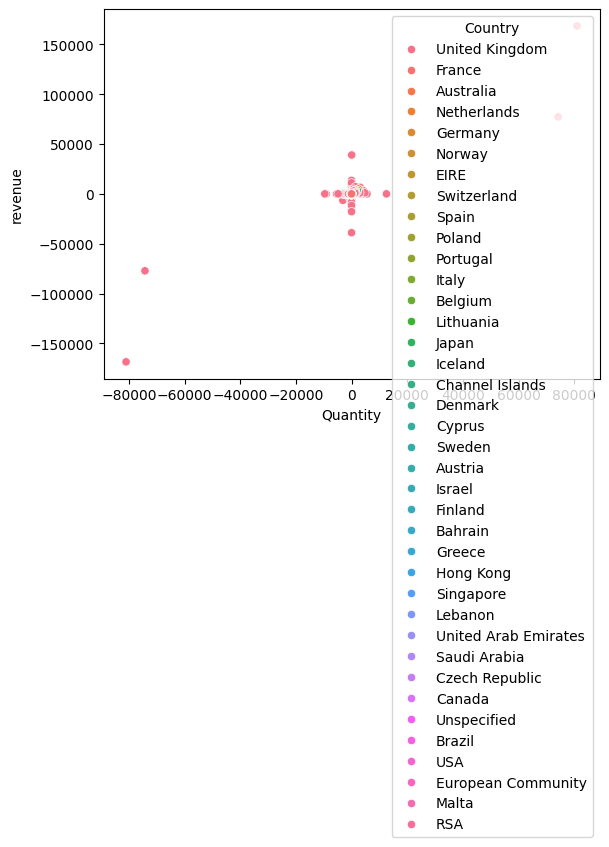

In [ ]:
sns.scatterplot(data=df, x="Quantity", y="revenue", hue="Country")

In [ ]:
highest_revenue_index = df['revenue'].idxmax()
print(highest_revenue_index)
print(df.loc[highest_revenue_index])
df= df.drop(highest_revenue_index)


540421
InvoiceNo                           581483
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                             80995
InvoiceDate                 12/9/2011 9:15
UnitPrice                             2.08
CustomerID                         16446.0
Country                     United Kingdom
revenue                           168469.6
Name: 540421, dtype: object


In [ ]:
summary = pd.concat([gross_by_country, returns_by_country], axis=1)
summary.columns = ['Gross', 'Returns']


In [ ]:
# Find rows where Gross is NaN
gross_nulls = summary[summary['Gross'].isnull()]

# Find rows where Returns is NaN
returns_nulls = summary[summary['Returns'].isnull()]
print(gross_nulls, returns_nulls)

Empty DataFrame
Columns: [Gross, Returns]
Index: []                         Gross  Returns
Country                               
Brazil                1143.60      NaN
Canada                3666.38      NaN
Iceland               4310.00      NaN
Lebanon               1693.88      NaN
Lithuania             1661.06      NaN
RSA                   1002.31      NaN
United Arab Emirates  1902.28      NaN
Unspecified           4749.79      NaN


In [ ]:
# Fill NaNs with 0
summary['Gross'] = summary['Gross'].fillna(0)
summary['Returns'] = summary['Returns'].fillna(0)

# Calculate ReturnRate safely

summary['ReturnRate'] = abs(summary['Returns']) / summary['Gross']
summary['ReturnRate'] = summary['ReturnRate'].replace([np.inf, -np.inf], np.nan)
summary['ReturnRate'].sort_values(ascending=False)

,ReturnRate
Country,
Singapore,0.571396
USA,0.516555
Hong Kong,0.355266
Bahrain,0.272814
Czech Republic,0.143963
Portugal,0.129791
Spain,0.110472
Saudi Arabia,0.101083
United Kingdom,0.090557


In [ ]:
df_cust = df[df['CustomerID'].notnull()]
df_cust.shape

(401603, 9)

In [ ]:
customer = df_cust.groupby('CustomerID')['revenue'].sum().reset_index()
customer = customer.sort_values(by = 'revenue', ascending = False)
print(customer)

      CustomerID    revenue
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187322.17
1895     14911.0  132458.73
55       12415.0  123725.45
...          ...        ...
3870     17603.0   -1165.30
1384     14213.0   -1192.20
2236     15369.0   -1592.49
3756     17448.0   -4287.63
3033     16446.0 -168466.70

[4372 rows x 2 columns]


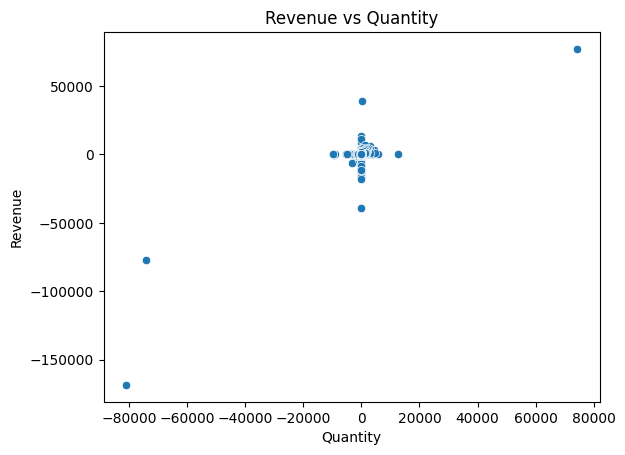

In [ ]:
sns.scatterplot(data=df, x="Quantity", y="revenue")
plt.title('Revenue vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

In [ ]:
df['Quantity'].describe()


,Quantity
count,536640.000000
mean,9.469117
std,189.199389
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,74215.000000


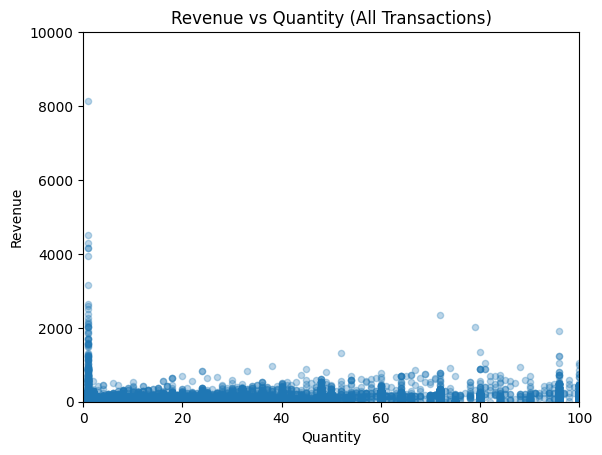

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: each transaction
df.plot.scatter(x='Quantity', y='revenue', alpha=0.3)
plt.title('Revenue vs Quantity (All Transactions)')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.xlim(0, 100)
plt.ylim(0,10000)
plt.show()


In [ ]:
quantity_group = df.groupby('Quantity')['revenue'].sum().reset_index()
quantity_group = quantity_group.sort_values('Quantity')
print(quantity_group)

     Quantity   revenue
0      -80995 -168469.6
1      -74215  -77183.6
2       -9600       0.0
3       -9360    -280.8
4       -9058       0.0
..        ...       ...
716      4300    3096.0
717      4800    1008.0
718      5568       0.0
719     12540       0.0
720     74215   77183.6

[721 rows x 2 columns]


/tmp/ipython-input-211-3406819139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Quantity_Bin'] = pd.cut(df_sales['Quantity'], bins=bins, labels=labels)
/tmp/ipython-input-211-3406819139.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df_sales.groupby('Quantity_Bin')['revenue'].mean().reset_index()


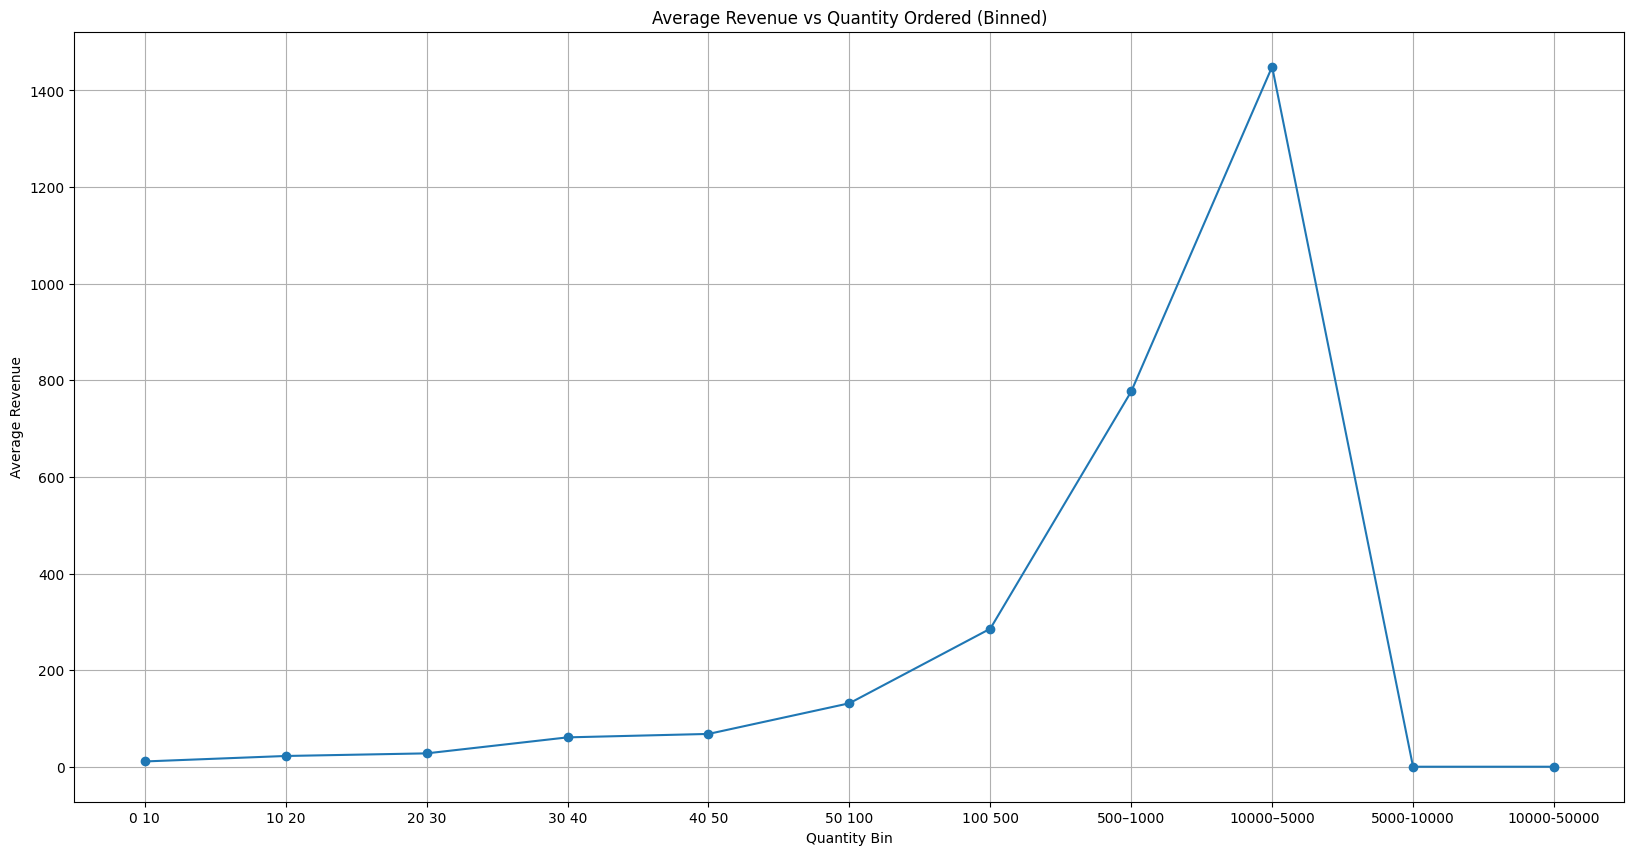

In [ ]:
import pandas as pd

df_sales = df[df['Quantity'] > 0]

# Create bins
bins = [0, 10,20,30,40,50,100,500, 1000, 5000, 10000, 50000]
labels =['0 10','10 20','20 30','30 40', '40 50','50 100','100 500', '500–1000', '10000–5000', '5000-10000', '10000-50000']

df_sales['Quantity_Bin'] = pd.cut(df_sales['Quantity'], bins=bins, labels=labels)

# Group by bin
bin_group = df_sales.groupby('Quantity_Bin')['revenue'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.plot(bin_group['Quantity_Bin'], bin_group['revenue'], marker='o')
plt.title('Average Revenue vs Quantity Ordered (Binned)')
plt.xlabel('Quantity Bin')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 100, 500, 1000, 5000,10000,20000,50000, df['revenue'].max()]
labels = ['1–10', '11–20', '21–30', '31–40', '41–50', '51–100', '101–500', '501–1000', '1001–5000', '5001-10000', '10001-20000', '20001-50000', '50000+']

df_sales = df[df['Quantity'] > 0]

df_sales['Quantity_Bin'] = pd.cut(df_sales['Quantity'], bins=bins, labels=labels)


/tmp/ipython-input-212-3770608882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Quantity_Bin'] = pd.cut(df_sales['Quantity'], bins=bins, labels=labels)


In [ ]:
bin_counts = df_sales.groupby('Quantity_Bin').size().reset_index(name='Transaction_Count')
print(bin_counts)


   Quantity_Bin  Transaction_Count
0          1–10             393746
1         11–20              75327
2         21–30              31154
3         31–40               6274
4         41–50               7241
5        51–100               7364
6       101–500               4516
7      501–1000                317
8     1001–5000                111
9    5001-10000                  1
10  10001-20000                  1
11  20001-50000                  0
12       50000+                  1


/tmp/ipython-input-213-2594255219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_sales.groupby('Quantity_Bin').size().reset_index(name='Transaction_Count')


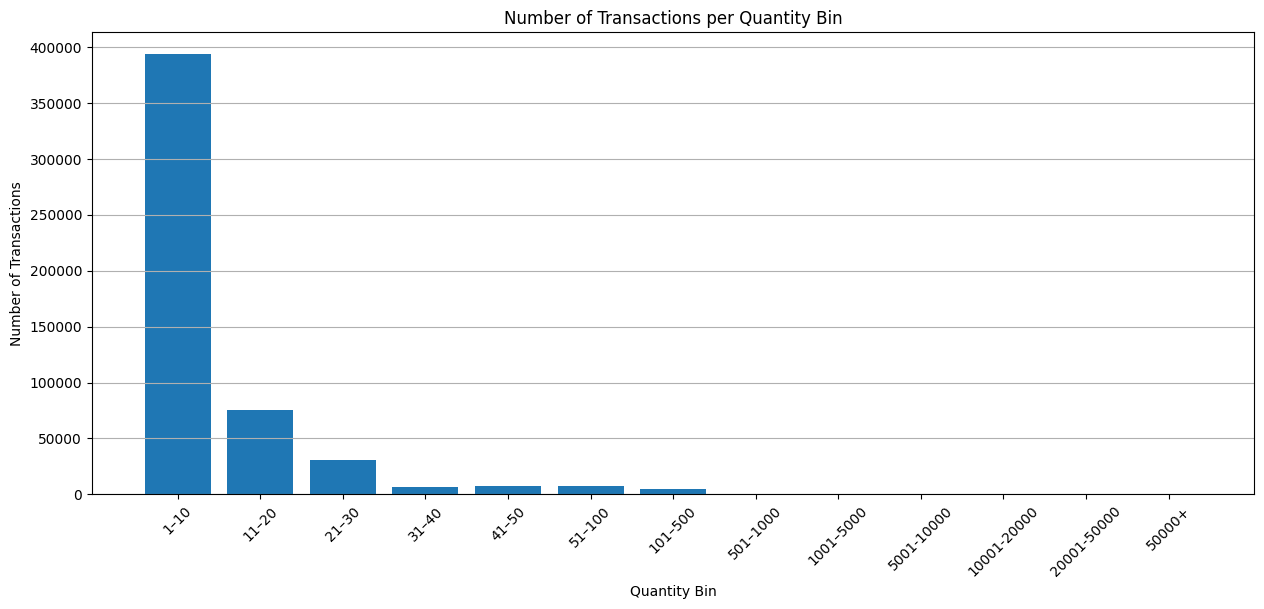

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(bin_counts['Quantity_Bin'], bin_counts['Transaction_Count'])
plt.title('Number of Transactions per Quantity Bin')
plt.xlabel('Quantity Bin')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceMonth']

,InvoiceMonth
0,2010-12
1,2010-12
2,2010-12
3,2010-12
4,2010-12
...,...
541904,2011-12
541905,2011-12
541906,2011-12
541907,2011-12


In [ ]:
monthly_revenue = df.groupby('InvoiceMonth')['revenue'].sum().reset_index()
print(monthly_revenue)


   InvoiceMonth      revenue
0       2010-12   746723.610
1       2011-01   558448.560
2       2011-02   497026.410
3       2011-03   682013.980
4       2011-04   492367.841
5       2011-05   722094.100
6       2011-06   689977.230
7       2011-07   680156.991
8       2011-08   681386.460
9       2011-09  1017596.682
10      2011-10  1069368.230
11      2011-11  1456145.800
12      2011-12   264231.460


Monthly Revenue

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['InvoiceMonth'].astype(str), monthly_revenue['revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
gross = df_no_returns['revenue'].sum()
print(gross)

ret = returns['revenue'].sum()
print(ret)

Net_sales = gross + ret
print(Net_sales)

10644560.424000002
-896812.49
9747747.934000002


In [ ]:
df_no_returns['revenue']

,revenue
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [ ]:
returns['revenue']

,revenue
141,-27.50
154,-4.65
235,-19.80
236,-6.96
237,-6.96
...,...
540449,-9.13
541541,-224.69
541715,-54.75
541716,-1.25


In [ ]:
df_no_returns['InvoiceDate'] = pd.to_datetime(df_no_returns['InvoiceDate'])
df_no_returns['InvoiceMonth'] = df_no_returns['InvoiceDate'].dt.to_period('M')

returns['InvoiceDate'] = pd.to_datetime(returns['InvoiceDate'])
returns['InvoiceMonth'] = returns['InvoiceDate'].dt.to_period('M')

monthly_gross = df_no_returns.groupby('InvoiceMonth')['revenue'].sum()
monthly_returns = returns.groupby('InvoiceMonth')['revenue'].sum()

monthly_net = monthly_gross.add(monthly_returns,fill_value=0)
print(monthly_net)



InvoiceMonth
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Freq: M, Name: revenue, dtype: float64


/tmp/ipython-input-222-376398881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns['InvoiceDate'] = pd.to_datetime(returns['InvoiceDate'])
/tmp/ipython-input-222-376398881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns['InvoiceMonth'] = returns['InvoiceDate'].dt.to_period('M')


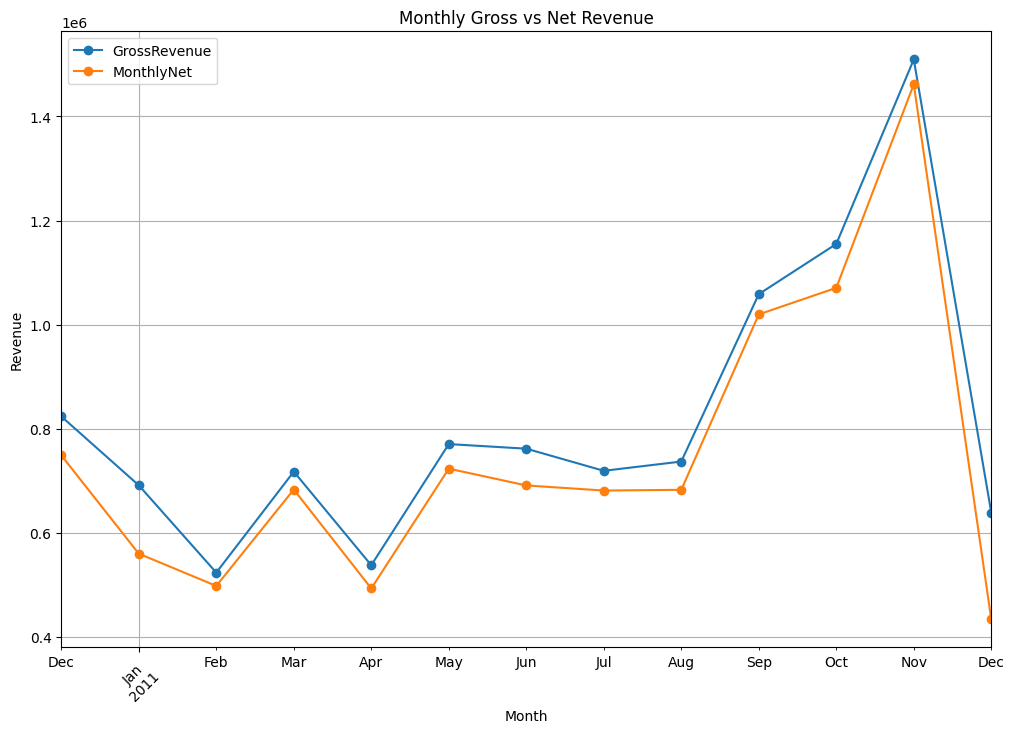

In [ ]:
plt.figure(figsize = (12,8))
monthly_gross.plot(label = 'GrossRevenue', marker = 'o')
monthly_net.plot(label = 'MonthlyNet', marker = 'o')
plt.title('Monthly Gross vs Net Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
monthly_revenue.set_index('InvoiceMonth', inplace = True)


In [ ]:
ts =  monthly_revenue['revenue']

In [ ]:
monthly_revenue

,revenue
InvoiceMonth,
2010-12,746723.610
2011-01,558448.560
2011-02,497026.410
2011-03,682013.980
2011-04,492367.841
2011-05,722094.100
2011-06,689977.230
2011-07,680156.991
2011-08,681386.460


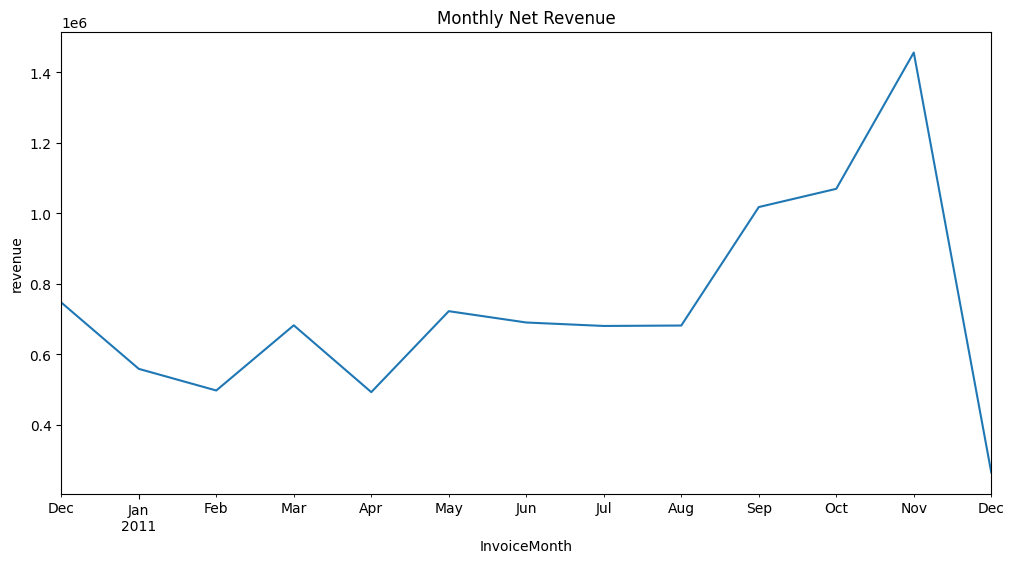

In [ ]:
import matplotlib.pyplot as plt

ts.plot(figsize=(12,6))
plt.title('Monthly Net Revenue')
plt.ylabel('revenue')
plt.show()


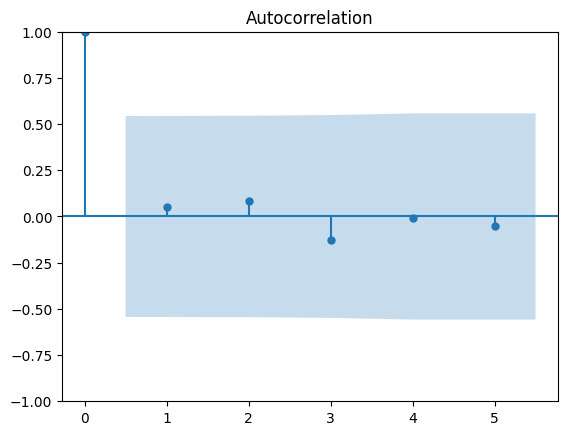

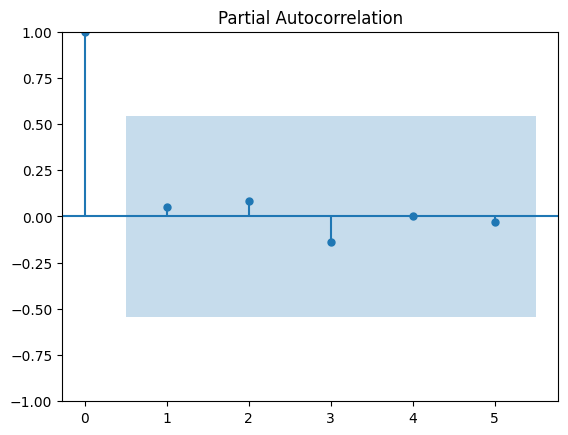

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts.dropna(), lags=5)
plot_pacf(ts.dropna(), lags=5)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Try simplest first
model = ARIMA(ts, order=(0,1,0))
fit = model.fit()
print(fit.summary())

# Optionally test a slightly more complex version
model2 = ARIMA(ts, order=(1,1,0)).fit()
print(model2.summary())

model3 = ARIMA(ts, order=(0,1,1)).fit()
print(model3.summary())


                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                   13
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -171.612
Date:                Sat, 05 Jul 2025   AIC                            345.225
Time:                        06:53:25   BIC                            345.710
Sample:                    12-31-2010   HQIC                           345.045
                         - 12-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.423e+11   3.04e+10      4.685      0.000    8.27e+10    2.02e+11
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                13.59
Prob(Q):                              0.31   Pr

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Convert index to timestamp
ts.index = ts.index.to_timestamp()



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Make sure index is timestamp


# Fit
model = ARIMA(ts, order=(1,1,0))
fit = model.fit()

# Get forecast
forecast_result = fit.get_forecast(steps=3)
forecast_mean = forecast_result.predicted_mean
print(forecast_mean)


2012-01-01    1.048915e+06
2012-02-01    5.323273e+05
2012-03-01    8.724171e+05
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


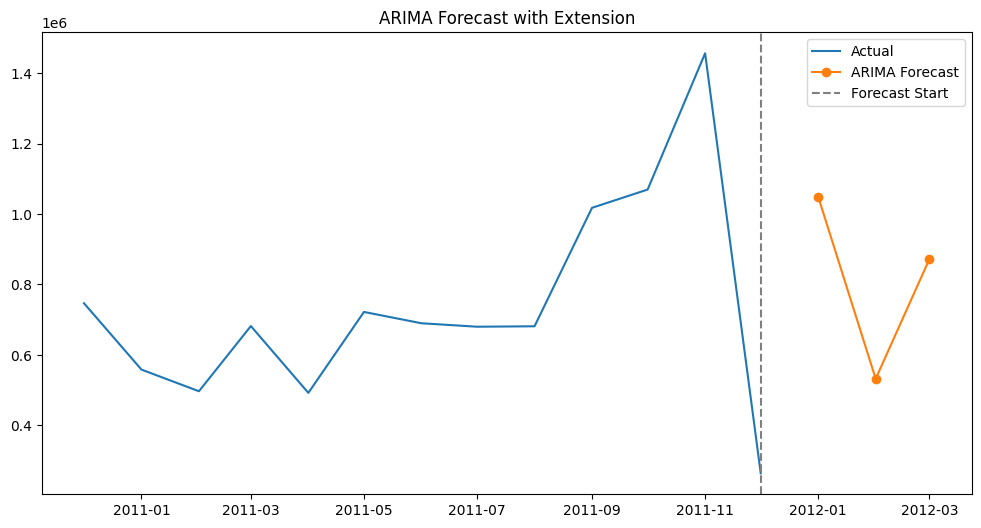

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(forecast_mean, label='ARIMA Forecast', marker='o')
plt.axvline(x=ts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('ARIMA Forecast with Extension')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Suppose your true values for last 3 months:
y_true = ts[-3:]  # your actual revenue
y_pred = forecast_mean  # your ARIMA forecast

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')



MAE: 517485.78
RMSE: 638683.22


In [ ]:
from prophet import Prophet

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df_prophet = ts.reset_index()
df_prophet.columns = ['ds', 'y']

In [ ]:
df_prophet

,ds,y
0,2010-12-01,746723.610
1,2011-01-01,558448.560
2,2011-02-01,497026.410
3,2011-03-01,682013.980
4,2011-04-01,492367.841
5,2011-05-01,722094.100
6,2011-06-01,689977.230
7,2011-07-01,680156.991
8,2011-08-01,681386.460
9,2011-09-01,1017596.682


In [ ]:
df_prophet.dtypes

,0
ds,datetime64[ns]
y,float64


In [ ]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [ ]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality = False,
    daily_seasonality = False,
    mcmc_samples = 500
)

model.fit(df_prophet)

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkfr753w/i3jog0jn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkfr753w/lx3r17fu.json
06:53:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=58798', 'data', 'file=/tmp/tmpbkfr753w/i3jog0jn.json', 'init=/tmp/tmpbkfr753w/lx3r17fu.json', 'output', 'file=/tmp/tmpbkfr753w/prophet_model7ofx06i2/prophet_model-20250705065327_1.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=58798', 'data', 'file=/tmp/tmpbkfr753w/i3jog0jn.json', 'init=/tmp/tmpbkfr753w/lx3r17fu.json', 'output', 'file=/tmp/tmpbkfr753w/prophet_model7ofx06i2/prophet_model-20250705065327_2.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

06:53:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=58798', 'data', 'file=/tmp/tmpbkfr753w/i3jog0jn.json', 'init=/tmp/tmpbkfr753w/lx3r17fu.json', 'output', 'file=/tmp/tmpbkfr753w/prophet_model7ofx06i2/prophet_model-20250705065327_1.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbkfr753w/prophet_model7ofx06i2/prophet_model-20250705065327_1.csv
 console_msgs (if any):
	/tmp/tmpbkfr753w/prophet_model7ofx06i2/prophet_model-20250705065327_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 250
    num_warmup = 250
    save_warmup = 0 (Default)
    thin = 1 (Defau

In [ ]:
future = model.make_future_dataframe(periods = 3, freq = 'MS')
future.tail()

,ds
11,2011-11-01
12,2011-12-01
13,2012-01-01
14,2012-02-01
15,2012-03-01


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
11,2011-11-01,1.470438e+06,2.014053e+05,2.774987e+06
12,2011-12-01,2.838090e+05,-9.422012e+05,1.574496e+06
13,2012-01-01,7.594263e+04,-2.651445e+06,2.921072e+06
14,2012-02-01,4.499042e+04,-2.672522e+06,2.736585e+06
15,2012-03-01,4.163938e+05,-4.557315e+06,4.994821e+06


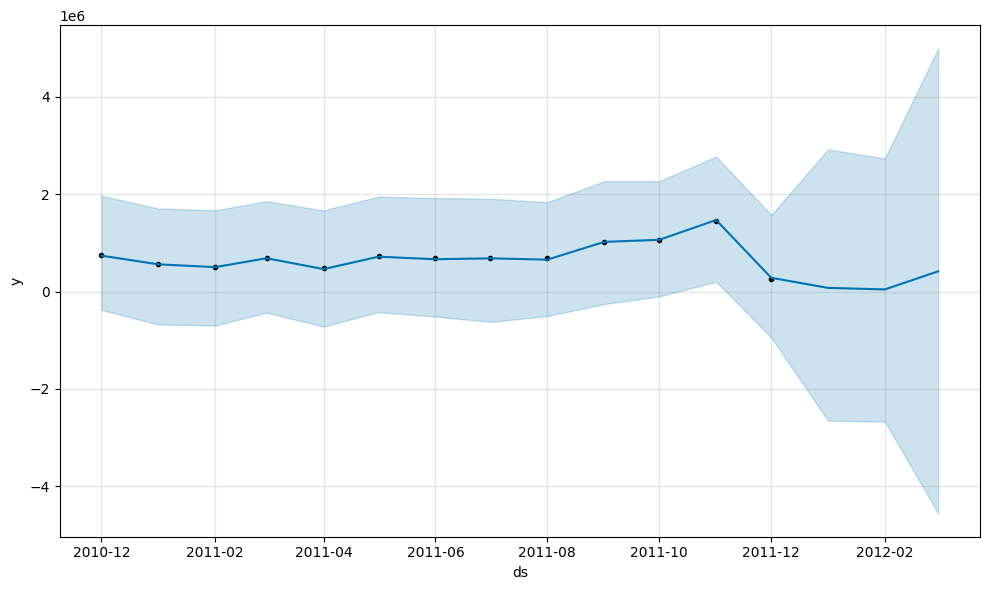

In [ ]:
fig1 = model.plot(forecast)


In [ ]:
# Get true last 3 months
y_true = ts[-3:]

# Prophet forecast covers ALL months → pick matching last 3 actual dates
prophet_pred = forecast.set_index('ds').loc[y_true.index, 'yhat']

print("Actual:", y_true.values)
print("Prophet:", prophet_pred.values)

Actual: [1069368.23 1456145.8   264231.46]
Prophet: [1063614.7316803  1470438.08473857  283809.04611674]


In [ ]:
mae = mean_absolute_error(y_true, prophet_pred)
rmse = np.sqrt(mean_squared_error(y_true, prophet_pred))

print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")


Prophet MAE: 13207.79
Prophet RMSE: 14383.49


In [ ]:
from sklearn.linear_model import LinearRegression

# Make DataFrame for sklearn
df_reg = ts.reset_index()
df_reg.columns = ['ds', 'y']

# Add numeric month index
df_reg['t'] = np.arange(len(df_reg))
print(df_reg.head())


          ds           y  t
0 2010-12-01  746723.610  0
1 2011-01-01  558448.560  1
2 2011-02-01  497026.410  2
3 2011-03-01  682013.980  3
4 2011-04-01  492367.841  4


In [ ]:
# Model
model = LinearRegression()

# X = time index, y = revenue
X = df_reg[['t']]
y = df_reg['y']

# Fit
model.fit(X, y)

# Slope and intercept
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')


Intercept: 562917.7476153846
Slope: 28712.905576923084


In [ ]:
# Make future t values
future_t = np.arange(len(df_reg), len(df_reg) + 3).reshape(-1, 1)

# Predict
future_pred = model.predict(future_t)

print(future_pred)


[936185.52011538 964898.42569231 993611.33126923]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


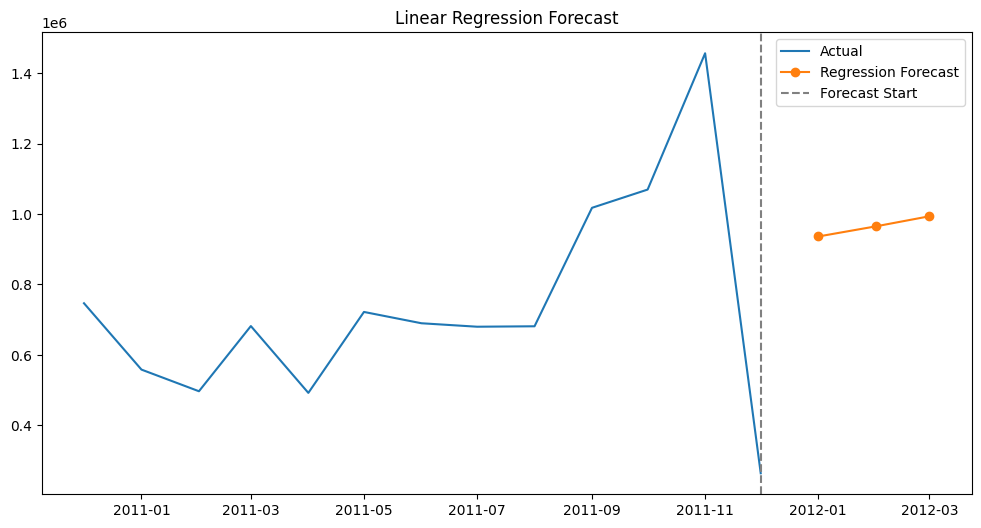

In [ ]:
# Build forecast index
future_dates = pd.date_range(
    start=ts.index[-1] + pd.offsets.MonthBegin(),
    periods=3,
    freq='MS'
)

# Series for plot
forecast_series = pd.Series(future_pred, index=future_dates)

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(forecast_series, label='Regression Forecast', marker='o')
plt.axvline(x=ts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Linear Regression Forecast')
plt.legend()
plt.show()


In [ ]:
df_reg = ts.reset_index()
df_reg.columns = ['ds', 'y']
df_reg['t'] = np.arange(len(df_reg))

# Add month as a categorical feature
df_reg['month'] = df_reg['ds'].dt.month.astype('category')

# One-hot encode months (drop first to avoid dummy trap)
X = pd.get_dummies(df_reg[['t', 'month']], drop_first=True)
y = df_reg['y']

print(X.head())

   t  month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0  0    False    False    False    False    False    False    False    False   
1  1    False    False    False    False    False    False    False    False   
2  2     True    False    False    False    False    False    False    False   
3  3    False     True    False    False    False    False    False    False   
4  4    False    False     True    False    False    False    False    False   

   month_10  month_11  month_12  
0     False     False      True  
1     False     False     False  
2     False     False     False  
3     False     False     False  
4     False     False     False  


In [ ]:
model = LinearRegression()
model.fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Intercept: 598656.2391666665
Coefficients: [ -40207.67916667  -21214.47083333  203980.77833333   54542.3185
  324476.25666667  332567.06583333  362954.506       404391.65416667
  780809.55533333  872788.7825     1299774.03166667  148067.37083333]


In [ ]:
# Make future months DataFrame
future_t = np.arange(len(df_reg), len(df_reg)+3)
future_months = pd.Series([(ts.index[-1] + pd.DateOffset(months=i+1)).month for i in range(3)], name='month').astype('category')

X_future = pd.get_dummies(pd.DataFrame({'t': future_t, 'month': future_months}), drop_first=True)

# Make sure columns match (add missing if needed)
X_future = X_future.reindex(columns=X.columns, fill_value=0)

# Predict
future_pred = model.predict(X_future)

print(future_pred)


[ 75956.41  14534.26 199521.83]


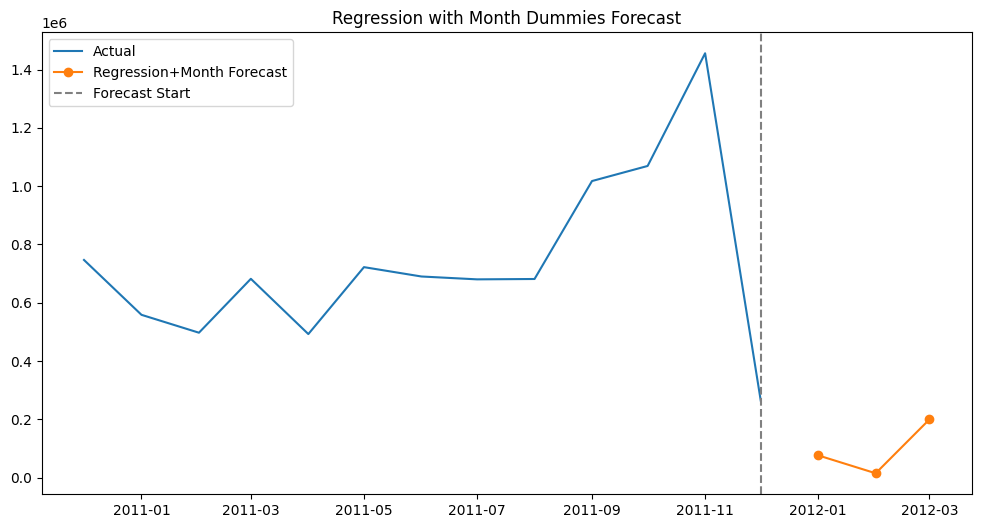

In [ ]:
# Build future index
future_dates = pd.date_range(
    start=ts.index[-1] + pd.offsets.MonthBegin(),
    periods=3, freq='MS'
)

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(future_dates, future_pred, label='Regression+Month Forecast', marker='o')
plt.axvline(x=ts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Regression with Month Dummies Forecast')
plt.legend()
plt.show()


In [ ]:
# Compare same holdout
y_true = ts[-3:]
# Pick matching future_pred or align if needed

print("Actual:", y_true.values)
print("Predicted:", future_pred)

mae = mean_absolute_error(y_true, future_pred)
rmse = np.sqrt(mean_squared_error(y_true, future_pred))

print(f"Regression w/ Month MAE: {mae:.2f}")
print(f"Regression w/ Month RMSE: {rmse:.2f}")


Actual: [1069368.23 1456145.8   264231.46]
Predicted: [ 75956.41  14534.26 199521.83]
Regression w/ Month MAE: 833244.33
Regression w/ Month RMSE: 1011483.76


In [ ]:
# Example: your original monthly time series
actual = ts.copy()
actual.name = 'Gross_Revenue'


In [ ]:
actual = df['revenue']
returns = returns['revenue']  # not Date!

net_revenue = actual + returns
net_revenue.name = 'Net_Revenue'


In [ ]:
# Prophet forecast index is already timestamp
prophet = forecast.set_index('ds')['yhat']
prophet.name = 'Prophet_Forecast'


In [ ]:
arima = forecast_mean.copy()  # the ARIMA forecast you ran
arima.name = 'ARIMA_Forecast'


In [ ]:
# Regression only for the future period? Make a matching Series:
regression = pd.Series(future_pred, index=future_dates)
regression.name = 'Regression_Forecast'


In [ ]:
# Example: your original monthly time series
actual = ts.copy()

actual.name = 'Gross_Revenue'


returns = df[df['InvoiceNo'].str.startswith('C')].copy()
returns['Revenue'] = returns['Quantity'] * returns['UnitPrice']

returns = returns.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['Revenue'].sum()
returns.name = 'Returns'

# Net Revenue = Gross + Returns
net_revenue = actual + returns
net_revenue.name = 'Net_Revenue'


# Prophet forecast index is already timestamp
prophet = forecast.set_index('ds')['yhat']
prophet.name = 'Prophet_Forecast'

# Suppose your future ARIMA forecast:
arima = forecast_mean.copy()
arima.name = 'ARIMA_Forecast'

# Suppose your Regression forecast:
regression = pd.Series(future_pred, index=future_dates)
regression.name = 'Regression_Forecast'

In [ ]:
# Combine actuals for historical + forecasts for future months
df_final = pd.concat([actual, returns, net_revenue], axis=1)

# Add forecasts — merge on index
df_final = df_final.merge(prophet, how='left', left_index=True, right_index=True)
df_final = df_final.merge(arima, how='left', left_index=True, right_index=True)
df_final = df_final.merge(regression, how='left', left_index=True, right_index=True)

# Reset index for Tableau
df_final = df_final.reset_index()
df_final.rename(columns={'index': 'Date'}, inplace=True)

# Build new DataFrame for future months
future_df = pd.DataFrame({
    'Date': future_dates,
    'Gross_Revenue': np.nan,
    'Returns': np.nan,
    'Net_Revenue': np.nan,
    'Prophet_Forecast': forecast.set_index('ds').loc[future_dates]['yhat'],
    'ARIMA_Forecast': arima,
    'Regression_Forecast': regression
})

# Combine historical + future
final_df = pd.concat([df_final, future_df], ignore_index=True)

print(final_df.tail())



         Date  Gross_Revenue    Returns  Net_Revenue  Prophet_Forecast  \
11 2011-11-01     1456145.80  -47720.98   1408424.82      1.470438e+06   
12 2011-12-01      264231.46 -205089.27     59142.19      2.838090e+05   
13 2012-01-01            NaN        NaN          NaN      7.594263e+04   
14 2012-02-01            NaN        NaN          NaN      4.499042e+04   
15 2012-03-01            NaN        NaN          NaN      4.163938e+05   

    ARIMA_Forecast  Regression_Forecast  
11             NaN                  NaN  
12             NaN                  NaN  
13    1.048915e+06             75956.41  
14    5.323273e+05             14534.26  
15    8.724171e+05            199521.83  


In [ ]:
final_df.to_excel('final_retail_forecast.xlsx', index=False)
final_df.shape

(16, 7)

In [ ]:
print(final_df)

         Date  Gross_Revenue    Returns  Net_Revenue  Prophet_Forecast  \
0  2010-12-01     746723.610  -74729.12   671994.490      7.380420e+05   
1  2011-01-01     558448.560 -131363.05   427085.510      5.599603e+05   
2  2011-02-01     497026.410  -25519.15   471507.260      5.023999e+05   
3  2011-03-01     682013.980  -34201.28   647812.700      6.853837e+05   
4  2011-04-01     492367.841  -44600.65   447767.191      4.619392e+05   
5  2011-05-01     722094.100  -47202.51   674891.590      7.167456e+05   
6  2011-06-01     689977.230  -70569.78   619407.450      6.644817e+05   
7  2011-07-01     680156.991  -37919.13   642237.861      6.828625e+05   
8  2011-08-01     681386.460  -54330.80   627055.660      6.559485e+05   
9  2011-09-01    1017596.682  -38838.51   978758.172      1.021429e+06   
10 2011-10-01    1069368.230  -81895.50   987472.730      1.063615e+06   
11 2011-11-01    1456145.800  -47720.98  1408424.820      1.470438e+06   
12 2011-12-01     264231.460 -205089.2

In [ ]:
df = pd.read_csv('final_retail_forecast.csv')

In [ ]:
df.tail()

,Date,Gross_Revenue,Returns,Net_Revenue,Prophet_Forecast,ARIMA_Forecast,Regression_Forecast
11,2011-11-01,1456145.80,-47720.98,1408424.82,1.496820e+06,NaN,NaN
12,2011-12-01,432701.06,-205089.27,227611.79,4.252527e+05,NaN,NaN
13,2012-01-01,NaN,NaN,NaN,1.778466e+05,1.038871e+06,244426.01
14,2012-02-01,NaN,NaN,NaN,3.247005e+05,6.798462e+05,183003.86
15,2012-03-01,NaN,NaN,NaN,3.018578e+05,8.924910e+05,367991.43


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/data.csv", encoding='latin1')

In [ ]:
pd.to_datetime(df['InvoiceDate'])

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [ ]:
df

,Date,Gross_Revenue,Returns,Net_Revenue,Prophet_Forecast,ARIMA_Forecast,Regression_Forecast
0,2010-12-01,746723.610,-74729.12,671994.490,7.499559e+05,NaN,NaN
1,2011-01-01,558448.560,-131363.05,427085.510,5.522982e+05,NaN,NaN
2,2011-02-01,497026.410,-25519.15,471507.260,4.881141e+05,NaN,NaN
3,2011-03-01,682013.980,-34201.28,647812.700,7.214492e+05,NaN,NaN
4,2011-04-01,492367.841,-44600.65,447767.191,4.713334e+05,NaN,NaN
5,2011-05-01,722094.100,-47202.51,674891.590,7.063737e+05,NaN,NaN
6,2011-06-01,689977.230,-70569.78,619407.450,7.057021e+05,NaN,NaN
7,2011-07-01,680156.991,-37919.13,642237.861,6.969742e+05,NaN,NaN
8,2011-08-01,681386.460,-54330.80,627055.660,6.891146e+05,NaN,NaN
9,2011-09-01,1017596.682,-38838.51,978758.172,1.019430e+06,NaN,NaN


In [ ]:
import pandas as pd

# Load your raw transactions data

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create clean monthly Date column
df['Date'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# Group Quantity monthly
monthly_quantity = df.groupby('Date')['Quantity'].sum().reset_index()

# Load your final forecast dataset
df_final = pd.read_csv("/content/final_retail_forecast.csv")
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Merge Quantity into your final forecast dataset
df_final = pd.merge(df_final, monthly_quantity, on='Date', how='left')

# Keep only the required columns
cols = [
    'Date', 'Gross_Revenue', 'Returns', 'Net_Revenue',
    'Quantity',
    'Prophet_Forecast', 'ARIMA_Forecast', 'Regression_Forecast'
]

df_final = df_final[cols]

# Save as Excel file
df_final.to_excel("Final_Retail_Forecast.xlsx", index=False)

print("✅ Final Excel saved: Final_Retail_Forecast.xlsx")
print(df_final.tail())


✅ Final Excel saved: Final_Retail_Forecast.xlsx
         Date  Gross_Revenue    Returns  Net_Revenue  Quantity  \
11 2011-11-01     1456145.80  -47720.98   1408424.82  740286.0   
12 2011-12-01      432701.06 -205089.27    227611.79  226333.0   
13 2012-01-01            NaN        NaN          NaN       NaN   
14 2012-02-01            NaN        NaN          NaN       NaN   
15 2012-03-01            NaN        NaN          NaN       NaN   

    Prophet_Forecast  ARIMA_Forecast  Regression_Forecast  
11      1.496820e+06             NaN                  NaN  
12      4.252527e+05             NaN                  NaN  
13      1.778466e+05    1.038871e+06            244426.01  
14      3.247005e+05    6.798462e+05            183003.86  
15      3.018578e+05    8.924910e+05            367991.43  
